In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('../Data/TimeSeriesData/Alcohol_Sales.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


In [5]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [6]:
len(df)

325

In [7]:
df = df.dropna()

In [8]:
len(df)

325

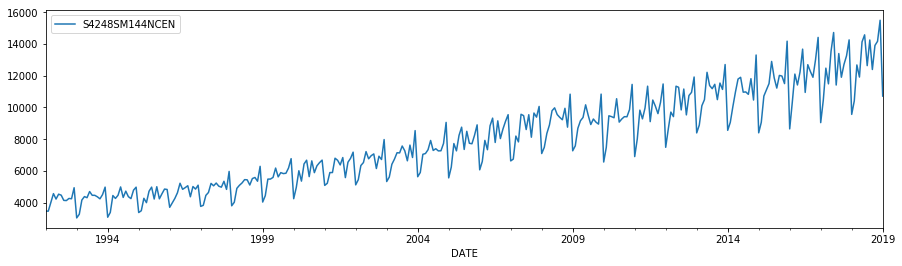

In [11]:
df.plot(figsize=(15,4))

In [12]:
y = df['S4248SM144NCEN'].values.astype(float)

In [13]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [15]:
test_size = 12

train_set = y[:-test_size]
test_set = y[-test_size:]

In [16]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [17]:
# normalize data for better performance

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))

scaler.fit(train_set.reshape(-1,1))

train_norm = scaler.transform(train_set.reshape(-1,1))

In [18]:
train_norm

array([[-0.92683135],
       [-0.92700231],
       [-0.83400291],
       [-0.73792632],
       [-0.79656381],
       [-0.74390974],
       [-0.75467989],
       [-0.81092401],
       [-0.81280451],
       [-0.79006753],
       [-0.79331567],
       [-0.67433114],
       [-1.        ],
       [-0.9606804 ],
       [-0.80699205],
       [-0.76989486],
       [-0.7818617 ],
       [-0.71536029],
       [-0.75604753],
       [-0.75621848],
       [-0.77211727],
       [-0.79399949],
       [-0.74886742],
       [-0.66783486],
       [-0.99247799],
       [-0.94084965],
       [-0.75861185],
       [-0.78972562],
       [-0.75570562],
       [-0.66595436],
       [-0.77895547],
       [-0.71142833],
       [-0.77040773],
       [-0.79194803],
       [-0.70031627],
       [-0.66834772],
       [-0.94204633],
       [-0.92255748],
       [-0.78835798],
       [-0.83537054],
       [-0.71211215],
       [-0.66783486],
       [-0.7962219 ],
       [-0.66339003],
       [-0.79417044],
       [-0

In [22]:
# len(y) - test_size - window_size

train_norm = torch.FloatTensor(train_norm).view(-1)
train_norm

tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
        -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607, -0.8070, -0.7699,
        -0.7819, -0.7154, -0.7560, -0.7562, -0.7721, -0.7940, -0.7489, -0.6678,
        -0.9925, -0.9408, -0.7586, -0.7897, -0.7557, -0.6660, -0.7790, -0.7114,
        -0.7704, -0.7919, -0.7003, -0.6683, -0.9420, -0.9226, -0.7884, -0.8354,
        -0.7121, -0.6678, -0.7962, -0.6634, -0.7942, -0.7396, -0.6889, -0.6931,
        -0.8858, -0.8373, -0.7896, -0.7285, -0.6260, -0.6914, -0.6735, -0.6528,
        -0.7719, -0.6613, -0.6890, -0.6468, -0.8757, -0.8643, -0.7567, -0.7258,
        -0.6275, -0.6536, -0.6239, -0.6576, -0.6685, -0.6049, -0.6923, -0.4984,
        -0.8692, -0.8311, -0.6808, -0.6480, -0.6229, -0.5870, -0.5890, -0.6451,
        -0.5753, -0.5637, -0.6042, -0.4435, -0.8289, -0.7600, -0.5815, -0.5808,
        -0.5630, -0.4623, -0.5572, -0.5114, -0.5218, -0.5182, -0.4617, -0.3606,
        -0.7928, -0.6716, -0.4911, -0.60

In [25]:
window_size = 12

In [26]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [27]:
train_data = input_data(train_norm,window_size)

In [28]:
len(train_data)

301

In [29]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]), tensor([-1.]))

In [30]:
train_data[1]

(tensor([-0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128,
         -0.7901, -0.7933, -0.6743, -1.0000]), tensor([-0.9607]))

In [31]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

In [32]:
torch.manual_seed(101)
model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [33]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):
    for seq,y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch}  Loss {loss.item()}')


total_time = time.time() - start_time
print(total_time/60)

Epoch 0  Loss 0.25314345955848694
Epoch 1  Loss 0.37523892521858215
Epoch 2  Loss 0.3901209831237793
Epoch 3  Loss 0.3494969308376312
Epoch 4  Loss 0.33077895641326904
Epoch 5  Loss 0.3323073089122772
Epoch 6  Loss 0.3266769051551819
Epoch 7  Loss 0.320770263671875
Epoch 8  Loss 0.3065176010131836
Epoch 9  Loss 0.29517000913619995
Epoch 10  Loss 0.26913923025131226
Epoch 11  Loss 0.25979331135749817
Epoch 12  Loss 0.24599941074848175
Epoch 13  Loss 0.22227251529693604
Epoch 14  Loss 0.18593791127204895
Epoch 15  Loss 0.18446007370948792
Epoch 16  Loss 0.17433606088161469
Epoch 17  Loss 0.25819718837738037
Epoch 18  Loss 0.22412163019180298
Epoch 19  Loss 0.2314874231815338
Epoch 20  Loss 0.1982879638671875
Epoch 21  Loss 0.19759857654571533
Epoch 22  Loss 0.19789332151412964
Epoch 23  Loss 0.16306482255458832
Epoch 24  Loss 0.13718470931053162
Epoch 25  Loss 0.13406342267990112
Epoch 26  Loss 0.12729120254516602
Epoch 27  Loss 0.028031891211867332
Epoch 28  Loss 0.0514042042195797
Epoc

In [35]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

In [36]:
preds[window_size:]

[0.21018753945827484,
 0.6813356876373291,
 0.4511790871620178,
 0.8427619338035583,
 1.077752709388733,
 0.4180324673652649,
 0.7925911545753479,
 0.6075099110603333,
 0.6477755308151245,
 0.8228463530540466,
 0.900655210018158,
 0.16044515371322632]

In [38]:
# invert normalization

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))

In [39]:
true_predictions

array([[10109.99201206],
       [12865.97310483],
       [11519.67207035],
       [13810.23593178],
       [15184.81447357],
       [11325.78091785],
       [13516.76195869],
       [12434.12922475],
       [12669.6629675 ],
       [13693.73974219],
       [14148.882651  ],
       [ 9819.02392665]])

In [40]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [41]:
# add in datetime stamps for true_preds

x = np.arange('2018-02-01','2019-02-01',dtype='datetime64[M]')

In [42]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [43]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

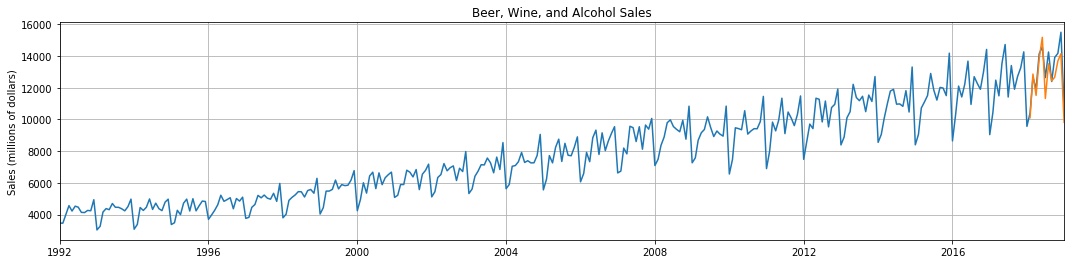

In [45]:
plt.figure(figsize=(18,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

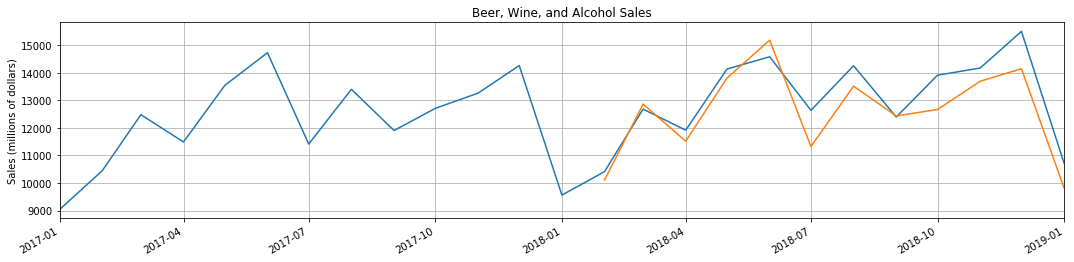

In [46]:
# Plot the end of the graph
fig = plt.figure(figsize=(18,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

In [47]:
# Forecast into unknown future

epochs = 100

# set model to back to training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):
    
    # train on the full set of sequences
    for seq, y_train in all_data:  
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.01750674
Epoch:  2 Loss: 0.02554025
Epoch:  3 Loss: 0.01653499
Epoch:  4 Loss: 0.01468250
Epoch:  5 Loss: 0.01320624
Epoch:  6 Loss: 0.01256410
Epoch:  7 Loss: 0.01241191
Epoch:  8 Loss: 0.01241134
Epoch:  9 Loss: 0.01345472
Epoch: 10 Loss: 0.01386092
Epoch: 11 Loss: 0.00894667
Epoch: 12 Loss: 0.01058405
Epoch: 13 Loss: 0.00530207
Epoch: 14 Loss: 0.00876150
Epoch: 15 Loss: 0.00688313
Epoch: 16 Loss: 0.01060761
Epoch: 17 Loss: 0.00699611
Epoch: 18 Loss: 0.00770490
Epoch: 19 Loss: 0.00809824
Epoch: 20 Loss: 0.00723400
Epoch: 21 Loss: 0.00469788
Epoch: 22 Loss: 0.00249525
Epoch: 23 Loss: 0.00663989
Epoch: 24 Loss: 0.00386206
Epoch: 25 Loss: 0.00630936
Epoch: 26 Loss: 0.00537201
Epoch: 27 Loss: 0.00595307
Epoch: 28 Loss: 0.00518363
Epoch: 29 Loss: 0.00443813
Epoch: 30 Loss: 0.00142744
Epoch: 31 Loss: 0.00488426
Epoch: 32 Loss: 0.00097735
Epoch: 33 Loss: 0.00222117
Epoch: 34 Loss: 0.00133126
Epoch: 35 Loss: 0.00130132
Epoch: 36 Loss: 0.00104895
Epoch: 37 Loss: 0.00194517
E

In [48]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

        
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

In [49]:
true_predictions

array([[10415.00001808],
       [12683.00013363],
       [11919.00006013],
       [14137.99993426],
       [14583.00009555],
       [12640.00017402],
       [14257.00005591],
       [12395.9999277 ],
       [13913.99994579],
       [14173.99995232],
       [15504.        ],
       [10717.99998423],
       [11192.85416582],
       [13070.92201835],
       [12343.89457971],
       [13947.85474253],
       [14391.04163235],
       [13135.4749285 ],
       [14258.33120087],
       [13216.01049954],
       [14065.99469399],
       [14151.72548479],
       [15838.46866417],
       [11113.27634262]])

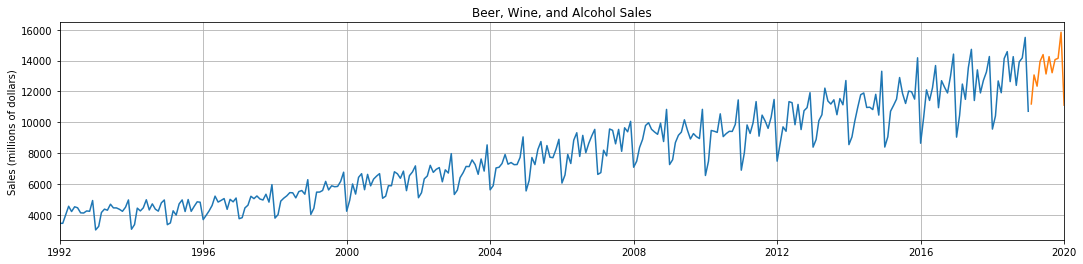

In [51]:
# PLOT THE RESULT
# Set a data range for the predicted data.
# Remember that the stop date has to be later than the last predicted value.
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(18,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

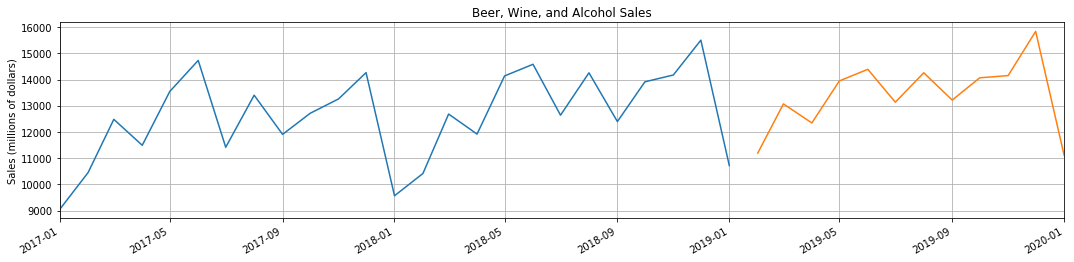

In [52]:
fig = plt.figure(figsize=(18,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()